In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist  
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
# tf.keras.datasets.boston_housing
# tf.keras.datasets.cifar10
# tf.keras.datasets.cifar100
# tf.keras.datasets.imdb
# tf.keras.datasets.reuters
# tf.keras.datasets.fashion_mnist

In [4]:
# from sklearn.datasets import load_iris
# iris=load_iris()
# print(iris.DESCR)

In [5]:
x_train,x_valid=x_train[:50000],x_train[50000:]
y_train,y_valid=y_train[:50000],y_train[50000:]

In [19]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [20]:
def show_single_image(img):
    plt.imshow(img,cmap='binary')
    plt.show()
    

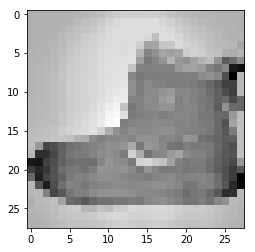

In [21]:
show_single_image(x_train[0])

In [22]:
def show_images(n_rows,n_cols,x_data,y_data,classes_name):
    assert n_rows*n_cols<len(x_data)
    assert len(x_data)==len(y_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index=n_cols*row+col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap='binary',interpolation='nearest')
            plt.title(classes_name[y_data[index]])
            plt.axis('off')
    plt.show()

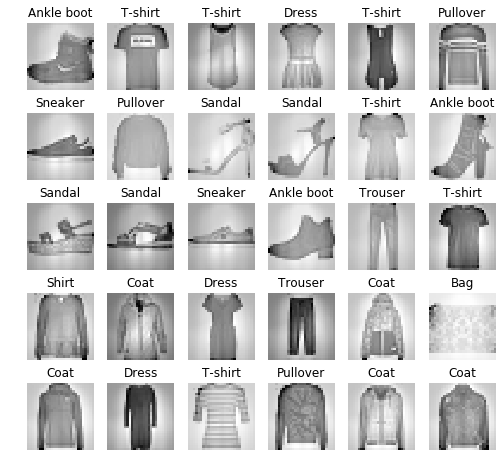

In [23]:
classes_name=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
show_images(5,6,x_train,y_train,classes_name)

In [24]:
# relu: y=max(0,x)
# softmax: y=[e^x1/sum,e^x2/sum,e^x3/sum]  sum=e^x1+e^x2+e^x3

In [25]:
y_train[0]

9

In [26]:
#使用Sequential模型
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [27]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [28]:
history=model.fit(x_train,y_train,validation_data=[x_valid,y_valid],epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 65us/sample - loss: 0.5289 - accuracy: 0.8164 - val_loss: 0.4092 - val_accuracy: 0.8537
Epoch 2/10
50000/50000 [==============================] - 3s 61us/sample - loss: 0.3697 - accuracy: 0.8675 - val_loss: 0.3774 - val_accuracy: 0.8630
Epoch 3/10
50000/50000 [==============================] - 3s 61us/sample - loss: 0.3278 - accuracy: 0.8820 - val_loss: 0.3641 - val_accuracy: 0.8681
Epoch 4/10
50000/50000 [==============================] - 3s 60us/sample - loss: 0.3004 - accuracy: 0.8918 - val_loss: 0.3384 - val_accuracy: 0.8792
Epoch 5/10
50000/50000 [==============================] - 3s 67us/sample - loss: 0.2797 - accuracy: 0.8995 - val_loss: 0.3290 - val_accuracy: 0.8818
Epoch 6/10
50000/50000 [==============================] - 3s 63us/sample - loss: 0.2613 - accuracy: 0.9060 - val_loss: 0.3249 - val_accuracy: 0.8837
Epoch 7/10
50000/50000 [==============================] 

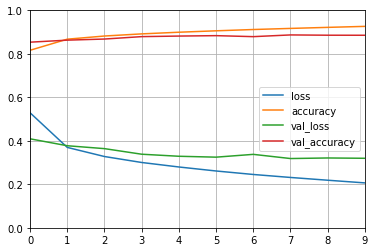

In [29]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot()
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curve(history)

In [30]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34591889297962186, 0.8802]